In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt

In [17]:
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, facecolor='white')

scanpy==1.9.1 anndata==0.8.0 umap==0.5.3 numpy==1.21.6 scipy==1.5.3 pandas==1.3.5 scikit-learn==1.0.2 statsmodels==0.13.2 python-igraph==0.9.10 pynndescent==0.5.6


In [3]:
# adata = sc.read('/home/yiming/vio_analysis/sc/seuratobject/adata.h5ad')
adata_subset = sc.read('/home/yiming/vio_analysis/sc/seuratobject/adata_subset.h5ad')
adata_subset

AnnData object with n_obs × n_vars = 5203 × 27059
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'DF.classifications', 'RNA_snn_res.0.8', 'seurat_clusters', 'celltype', 'label', 'sample', 'sc_clusters'
    var: 'features', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'celltype_colors', 'hvg', 'label_colors', 'leiden', 'log1p', 'neighbors', 'pca', 'umap'
    obsm: 'X_mnn', 'X_pca', 'X_tsne', 'X_umap'
    varm: 'MNN', 'PCs'
    obsp: 'connectivities', 'distances'

In [4]:
cell_prop = adata_subset.obs[['label', 'sample']]
cell_prop

,label,sample
VIO_D08_AAACCCATCCCATACC-1,Mesoderm,D08
VIO_D08_AAACGAACATACCAGT-1,Mesoderm,D08
VIO_D08_AAACGAAGTGTGTCCG-1,TB-like,D08
VIO_D08_AAACGCTAGGTAGGCT-1,Mesoderm,D08
VIO_D08_AAACGCTTCCTGATAG-1,Mesoderm,D08
...,...,...
VIO_D18_TTGTGGACAGCGATTT-1,TB-like,D18
VIO_D18_TTGTTTGAGACTCGAG-1,Mesoderm,D18
VIO_D18_TTTACTGAGATCGCTT-1,Endoderm,D18
VIO_D18_TTTAGTCCAATTGCAC-1,Endoderm,D18


In [5]:
cell_prop['count'] = np.ones((cell_prop.shape[0],))
cell_prop_matrix = pd.pivot_table(cell_prop, values='count', index='sample', columns='label', aggfunc='sum')
cell_prop_matrix

/home/yiming/.conda/envs/velocyte/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


label,Ectoderm,Endoderm,Immature PSC,Mesoderm,TB-like
sample,,,,,
D08,14.0,83.0,239.0,1322.0,578.0
D15,2067.0,6.0,1.0,158.0,613.0
D18,14.0,3.0,2.0,16.0,87.0


In [6]:
cols = ['Immature PSC', 'TB-like', 'Ectoderm', 'Mesoderm', 'Endoderm']
cell_prop_matrix = cell_prop_matrix[cols]
# pd.DataFrame.to_csv(cell_prop_matrix, 'subset_cell_prop_matrix.csv')
cell_prop_matrix

label,Immature PSC,TB-like,Ectoderm,Mesoderm,Endoderm
sample,,,,,
D08,239.0,578.0,14.0,1322.0,83.0
D15,1.0,613.0,2067.0,158.0,6.0
D18,2.0,87.0,14.0,16.0,3.0


In [7]:
sample_size = list([3136, 8364, 10796])
df = cell_prop_matrix.divide(sample_size, axis=0)
df

label,Immature PSC,TB-like,Ectoderm,Mesoderm,Endoderm
sample,,,,,
D08,0.076212,0.184311,0.004464,0.421556,0.026467
D15,0.000120,0.073290,0.247131,0.018890,0.000717
D18,0.000185,0.008059,0.001297,0.001482,0.000278


In [8]:
my_colors = list(['#FA9F9A', '#62ACE0', '#F4D58D', '#E56B6F', '#BE95C4'])

Text(0, 0.5, 'Cell proportion (non-hematopoietic)')

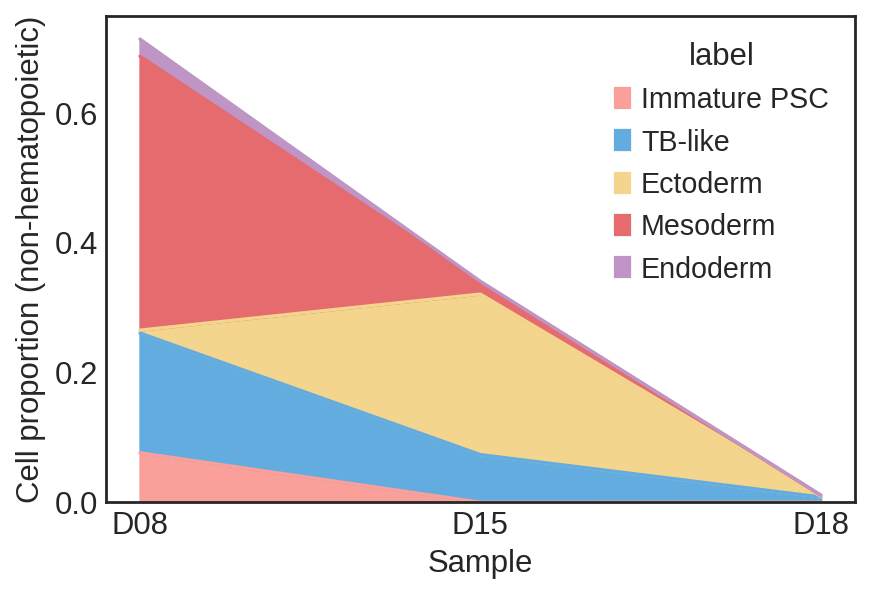

In [18]:
plt.style.use('seaborn-white')
plt.rcParams["figure.figsize"] = (6, 4)
df.plot.area(stacked=True, color=my_colors)
plt.xlabel('Sample')
plt.ylabel('Cell proportion (non-hematopoietic)')